The method  counting_sort  returned successfully for data size 259623 with 0.02899909019470215 seconds.
First 10 entries of sorted VecicleType are: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Time complexity plot:


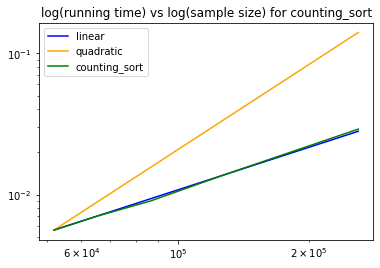

The method radix_time_sort returned successfully for data size 259623 with 0.6446883678436279 seconds.
First 10 entries of sorted DerectionTime_O are: ['2019-08-30 08:00:00', '2019-08-30 08:00:00', '2019-08-30 08:00:00', '2019-08-30 08:00:00', '2019-08-30 08:00:00', '2019-08-30 08:00:00', '2019-08-30 08:00:00', '2019-08-30 08:00:00', '2019-08-30 08:00:00', '2019-08-30 08:00:00']
Time complexity plot:


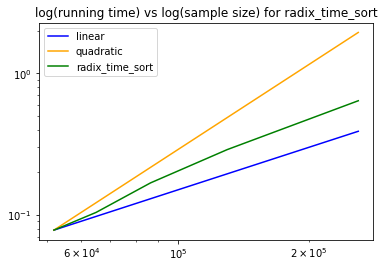

The method  radix_LSD_sort returned successfully for data size 259623 with 1.4073092937469482 seconds.
First 10 entries of sorted GantryID_O are: ['01F0005N', '01F0005N', '01F0005N', '01F0005N', '01F0005N', '01F0005N', '01F0005N', '01F0005N', '01F0005N', '01F0005N']
Time complexity plot:


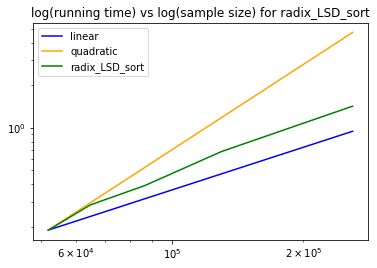

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from datetime import datetime

# check_sort_result and check_performance are copied from sort_code_comparison.ipynb with slight modification
def check_sort_result(func, data):
    start = time.time()
    data_copy = data[:] # important -- copy the list, instead of copy the reference.
    result = func(data_copy)
    time_used = time.time() - start
    for i in range(len(result)-1):
        if result[i] > result[i+1]:
            print("Check failed: func(data) is not sorted properly.")
            return
    print("The method {0} returned successfully for data size {1} with {2} seconds.".format(func.__name__.center(15), len(result), time_used))

def check_performance(func, data, size_samples = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]):
    timing_array = []
    for size in size_samples:
        n_repeated = size_samples[-1] // size
        start = time.time()
        for run in range(n_repeated):
            data_truncated = data[:size]
            func(data_truncated)
        timing_array.append((time.time() - start) / n_repeated)
    ref_linear = [i * timing_array[0] / size_samples[0] for i in size_samples]
    ref_quadratic = [i**2 * timing_array[0] / size_samples[0]**2 for i in size_samples]
    plt.loglog(size_samples, ref_linear,c='b',label='linear')
    plt.loglog(size_samples, ref_quadratic,c='orange',label='quadratic')
    plt.loglog(size_samples, timing_array,c='green',label='{}'.format(func.__name__))
    plt.title(f'log(running time) vs log(sample size) for {func.__name__}')
    plt.legend()
    plt.show()

# loading the data
file_path = 'C:\\Users\\cwk05\\Desktop\\DDM\\5051\\Assignment\\data\\TDCS_M06A_20190830_080000.csv'

df = pd.read_csv(file_path,header=None)
d1 = list(df.iloc[:,0]) # coloum 1
d2 = list(df.iloc[:,1]) # column 2
d2_dt = list(df.iloc[:,1].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))) #column 2 in datetime type
d3 = list(df.iloc[:,2]) # column 3
data_size = df.shape[0]

n = [1/5,1/4,1/3,1/2,1] # portion of data
test_size = [int(i*data_size) for i in n] # sizes for testing algorithm

def counting_sort(d):
    max_item = max(d)
    counts = [0 for i in range(max_item + 1)]
    for i in d:
        counts[i]+=1
    return [i for i in range(len(counts)) for j in range(counts[i])]

def counting_sort_by(array,max_rank=None,rank=lambda x: x):
    if max_rank==None:
        max_rank=0
        for item in array:
            if rank(item)>max_rank:
                max_rank=rank(item)
    counts = [[] for i in range(max_rank+1)]
    for item in array:
        counts[rank(item)].append(item)
    return [item for sublist in counts for item in sublist]     

def dig(rd,d):
    return 0 if d>=len(rd) else rd[-(d+1)]
    
def radix_time_sort(timearray):
    sorted_array = timearray.copy()
    sorted_array = counting_sort_by(sorted_array,60,lambda x: x.second)
    sorted_array = counting_sort_by(sorted_array,60,lambda x: x.minute)
    sorted_array = counting_sort_by(sorted_array,24,lambda x: x.hour)
    sorted_array = counting_sort_by(sorted_array,31,lambda x: x.day)
    sorted_array = counting_sort_by(sorted_array,12,lambda x: x.month)
    sorted_array = counting_sort_by(sorted_array,2030,lambda x: x.year)
    return sorted_array

def radix_LSD_sort(array):
    rd_array=[]
    max_length=0
    for item in array:
        list_item=list(item)
        rd_array.append(list_item)
        if max_length<len(list_item):
            max_length = len(list_item)
    for d in range(max_length):
        rd_array = counting_sort_by(rd_array,90,lambda rd: ord(dig(rd,d))) # use function ord to convert all characters to integers
    return [''.join(list_item) for list_item in rd_array]
    
# 1. Use counting_sort for column 0 (VecicleType)
check_sort_result(counting_sort, d1)
sorted_d1 = counting_sort(d1)
print(f'First 10 entries of sorted VecicleType are: {sorted_d1[:10]}')
print('Time complexity plot:')
check_performance(counting_sort,d1,test_size)

# 2. Use radix_time_sort for column 1 (DerectionTime_O)
check_sort_result(radix_time_sort, d2_dt)
sorted_d2_dt = radix_time_sort(d2_dt)
sorted_d2 = [datetime.strftime(i,'%Y-%m-%d %H:%M:%S') for i in sorted_d2_dt]
print(f'First 10 entries of sorted DerectionTime_O are: {sorted_d2[:10]}')
print('Time complexity plot:')
check_performance(radix_time_sort,d2_dt,test_size)

# 3. Use radix_LSD_sort for column 2 (GantryID_O)
check_sort_result(radix_LSD_sort, d3)
sorted_d3 = radix_LSD_sort(d3)
print(f'First 10 entries of sorted GantryID_O are: {sorted_d3[:10]}')
print('Time complexity plot:')
check_performance(radix_LSD_sort,d3,test_size)

